<a href="https://colab.research.google.com/github/saccordi/Analise_aprovados_conc_publ_insp_pcer/blob/master/Analise_aprovados_conc_publ_insp_pcerj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bem-vindo(a) ao meu notebook!**

Esse projeto tem como objetivo explorar os dados refrente à prova de conhecimentos do concurso público para o cargo de inspetor de polícia civil do estado do Rio de Janeiro (PCERJ), mais especificamente, sobre a prova realizada no ano de 2022 e os aprovados. As informações obtidas aqui podem ser utilizadas por candidatos, aprovados e demais pessoas interessadas nesse concurso.

In [1]:
# instalando as bibliotecas
!pip install tabula-py
!pip install JPype1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 6.3 MB/s eta 0:00:00


In [2]:
# importando as bibliotecas
import tabula
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from datetime import datetime

### Obtendo os dados
Os dados foram extraídos do [edital com o resultado definitivo da prova de conhecimentos](https://conhecimento.fgv.br/sites/default/files/concursos/156_pcrj_-_inspetor_de_policia_-_resultado_definitivo_prova_objetiva_classificacao_2022-03-25.pdf) publicado pela Fundação Getulio Vargas (FGV), banca organizadora do concurso.





In [3]:
# url do PDF
url = "https://conhecimento.fgv.br/sites/default/files/concursos/156_pcrj_-_inspetor_de_policia_-_resultado_definitivo_prova_objetiva_classificacao_2022-03-25.pdf"

# ler o PDF e extrair as tabelas
tables = tabula.read_pdf(url, pages="all", multiple_tables=True)

# concatenar as tabelas em um único DataFrame
df = pd.concat(tables)

### Dicionário de dados


*   `Inscrição`: número de inscrição do candidato;
*   `Nome`: nome do candidato;
*   `Nascimento`: data de nascimento do candidato
*   `Jurado`: indica se o candidato já atuou como jurado
*   `Portuguesa`: total de pontos que o candidato fez na matéria de português (cada questão valia um ponto e foram aplicadas 30 questões dessa matéria);
*   `Específicos`: total de pontos que o candidato fez nas matérias de direito penal, direito processual penal, direito constitucional, direito administrativo e legislação especial (cada questão valia um ponto e foram aplicadas 60 questões dessa matéria);
*   `Básicos de Informática`: total de pontos que o candidato fez na matéria de informática (cada questão valia um ponto e foram aplicadas 10 questões dessa matéria);
*   `Objetiva`: somatório dos pontos obtidos em todas as metérias, ou seja, o total de pontos do candidato;
*   `Unnamed: 0`: colocação do candidato (essa coluna será renomeada posteriormente);
*   `Situação`: tipo de aprovação, se ampla concorrência ou em alguma cota.


## Conhecendo o conjunto de dados

O primeiro passo do projeto é conhecer melhor o conjunto de dados. Esse processo ajuda a identificar possíveis tratamentos e transformações no conjunto de dados.

In [4]:
# visualizando as primeiras linhas do Dataframe
df.head()

,Inscrição,Nome,Nascimento,Jurado,Portuguesa,Específicos,Básicos de Informática,Objetiva,Unnamed: 0,Situação
0,156037280,Yuri Salibian,04/08/1989,-,23,48,9,80,1o,Aprovado
1,156003283,Gabriel Machado Figueiredo De Souza,02/04/1998,-,27,47,6,80,2o,Aprovado
2,156009518,Jonathan Cruz Da Paz,16/03/1999,-,20,51,8,79,3o,Aprovado Negro/Índio
3,156033635,Paulo Figueiredo Fonseca Lima,23/03/1986,-,23,50,6,79,4o,Aprovado
4,156045642,Victor Lorete Da Silva Branco,07/02/1993,-,24,49,6,79,5o,Aprovado


In [5]:
# visualizando as últimas linhas do Dataframe
df.tail()

,Inscrição,Nome,Nascimento,Jurado,Portuguesa,Específicos,Básicos de Informática,Objetiva,Unnamed: 0,Situação
4,156071396,Luiz Felipe Da Silva,03/09/1994,-,15,30,5,50,3160o,Aprovado
5,156031291,Juliana Lima Da Silva,17/11/1994,-,15,30,5,50,3161o,Aprovado
6,156062890,Isabella Costa Oliveira Machado,02/03/1996,-,15,30,5,50,3162o,Aprovado
7,156009110,Lucas Henrique Monteiro Da Silva,13/04/1996,-,15,30,5,50,3163o,Aprovado
8,156036343,Gabriel Rocha E Silva,03/04/1998,-,15,30,5,50,3164o,Aprovado


In [107]:
# verificando o tipo de dado do conjunto de dados
type(df)

pandas.core.frame.DataFrame

In [7]:
# visualizando as informações gerais do Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3164 entries, 0 to 8
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Inscrição               3164 non-null   int64 
 1   Nome                    3164 non-null   object
 2   Nascimento              3164 non-null   object
 3   Jurado                  3164 non-null   object
 4   Portuguesa              3164 non-null   int64 
 5   Específicos             3164 non-null   int64 
 6   Básicos de Informática  3164 non-null   int64 
 7   Objetiva                3164 non-null   int64 
 8   Unnamed: 0              3164 non-null   object
 9   Situação                3164 non-null   object
dtypes: int64(5), object(5)
memory usage: 271.9+ KB


In [8]:
# contando o número de linhas e colunas
print(f"Número de Linhas (aprovados): {df.shape[0]}")
print(f"Número de Colunas: {df.shape[1]}")

Número de Linhas (aprovados): 3164
Número de Colunas: 10


In [9]:
# visualizando as colunas do Dataframe
df.columns

Index(['Inscrição', 'Nome', 'Nascimento', 'Jurado', 'Portuguesa',
       'Específicos', 'Básicos de Informática', 'Objetiva', 'Unnamed: 0',
       'Situação'],
      dtype='object')

##Transformação e tratamentos de dados
No processo anterior, foi possível notar que o dataset precisa de alguns ajustes para uma análise mais completa e objetiva. Nesse sentido, notou-se que:

1. Ao ler os dados, a coluna Classificação apareceu com o nome 'Unnamed: 0'.

2. A coluna Objetiva poderia ter um nome mais amigável e claro.

3. As colunas Nome e Inscrição não serão uteis para essa análise.

4. O  conjunto de dados não tem uma coluna com a idade de cada candidato. Essa coluna será importante para análises posteriores.

Esses ajustes serão feitos a partir de agora.

In [10]:
# renomeado a coluna Unnamed: 0
df.rename(columns={'Unnamed: 0': 'Classificação'}, inplace=True)
df.head()

,Inscrição,Nome,Nascimento,Jurado,Portuguesa,Específicos,Básicos de Informática,Objetiva,Classificação,Situação
0,156037280,Yuri Salibian,04/08/1989,-,23,48,9,80,1o,Aprovado
1,156003283,Gabriel Machado Figueiredo De Souza,02/04/1998,-,27,47,6,80,2o,Aprovado
2,156009518,Jonathan Cruz Da Paz,16/03/1999,-,20,51,8,79,3o,Aprovado Negro/Índio
3,156033635,Paulo Figueiredo Fonseca Lima,23/03/1986,-,23,50,6,79,4o,Aprovado
4,156045642,Victor Lorete Da Silva Branco,07/02/1993,-,24,49,6,79,5o,Aprovado


In [11]:
# renomeado a coluna Objetiva
df.rename(columns={'Objetiva': 'Total de Pontos'}, inplace=True)
df.head()

,Inscrição,Nome,Nascimento,Jurado,Portuguesa,Específicos,Básicos de Informática,Total de Pontos,Classificação,Situação
0,156037280,Yuri Salibian,04/08/1989,-,23,48,9,80,1o,Aprovado
1,156003283,Gabriel Machado Figueiredo De Souza,02/04/1998,-,27,47,6,80,2o,Aprovado
2,156009518,Jonathan Cruz Da Paz,16/03/1999,-,20,51,8,79,3o,Aprovado Negro/Índio
3,156033635,Paulo Figueiredo Fonseca Lima,23/03/1986,-,23,50,6,79,4o,Aprovado
4,156045642,Victor Lorete Da Silva Branco,07/02/1993,-,24,49,6,79,5o,Aprovado


In [12]:
# removendo as colunas 'Nome' e 'Inscrição'
df.drop(['Inscrição', 'Nome'], axis=1, inplace=True)
df.head()

,Nascimento,Jurado,Portuguesa,Específicos,Básicos de Informática,Total de Pontos,Classificação,Situação
0,04/08/1989,-,23,48,9,80,1o,Aprovado
1,02/04/1998,-,27,47,6,80,2o,Aprovado
2,16/03/1999,-,20,51,8,79,3o,Aprovado Negro/Índio
3,23/03/1986,-,23,50,6,79,4o,Aprovado
4,07/02/1993,-,24,49,6,79,5o,Aprovado


In [15]:
# convertendo a coluna Data de Nascimento para o tipo datetime
warnings.filterwarnings("ignore")

df['Nascimento'] = pd.to_datetime(df['Nascimento'], format='%d/%m/%Y')

In [67]:
# criando a coluna Idade
import datetime
df['Idade'] = datetime.datetime.now().year - df['Nascimento'].dt.year

df.head()

,Nascimento,Jurado,Portuguesa,Específicos,Básicos de Informática,Total de Pontos,Classificação,Situação,Ampla/Cota,Idade
0,1989-08-04,-,23,48,9,80,1o,Aprovado,Ampla,35
1,1998-04-02,-,27,47,6,80,2o,Aprovado,Ampla,26
2,1999-03-16,-,20,51,8,79,3o,Aprovado Negro/Índio,Cota,25
3,1986-03-23,-,23,50,6,79,4o,Aprovado,Ampla,38
4,1993-02-07,-,24,49,6,79,5o,Aprovado,Ampla,31


In [68]:
# contando o número de linhas e colunas após os tratamentos
print(f"Número de Linhas (aprovados): {df.shape[0]}")
print(f"Número de Colunas: {df.shape[1]}")

Número de Linhas (aprovados): 3164
Número de Colunas: 10


##Primeiras análises


In [69]:
# analisando a coluna Situação isoladamente
df.Situação

0                Aprovado
1                Aprovado
2    Aprovado Negro/Índio
3                Aprovado
4                Aprovado
             ...         
4                Aprovado
5                Aprovado
6                Aprovado
7                Aprovado
8                Aprovado
Name: Situação, Length: 3164, dtype: object

In [70]:
# visualizando a quantidade por cada tipo de aprovação
contagem_situacao = df['Situação'].value_counts()

print("Quantidade por tipo de aprovação:")
print(f"Aprovado: {contagem_situacao['Aprovado']}")
print(f"Aprovado Negro/Índio: {contagem_situacao['Aprovado Negro/Índio']}")
print(f"Aprovado Hipossuficiente: {contagem_situacao['Aprovado Hipossuficiente']}")
print(f"Aprovado Negro/Índio Hipossuficiente: {contagem_situacao['Aprovado Negro/Índio Hipossuficiente']}")
print(f"Aprovado PcD: {contagem_situacao['Aprovado PcD']}")
print(f"Aprovado PcD Negro/Índio: {contagem_situacao['Aprovado PcD Negro/Índio']}")
print(f"Aprovado PcD Negro/Índio Hipossuficiente: {contagem_situacao['Aprovado PcD Negro/Índio Hipossuficiente']}")

Quantidade por tipo de aprovação:
Aprovado: 2612
Aprovado Negro/Índio: 452
Aprovado Hipossuficiente: 57
Aprovado Negro/Índio Hipossuficiente: 19
Aprovado PcD: 18
Aprovado PcD Negro/Índio: 5
Aprovado PcD Negro/Índio Hipossuficiente: 1


In [71]:
# criando uma coluna para categorizar se aprovado na ampla ou cota
df['Ampla/Cota'] = df['Situação'].apply(lambda x: 'Ampla' if x == 'Aprovado' else 'Cota')
df.head()

,Nascimento,Jurado,Portuguesa,Específicos,Básicos de Informática,Total de Pontos,Classificação,Situação,Ampla/Cota,Idade
0,1989-08-04,-,23,48,9,80,1o,Aprovado,Ampla,35
1,1998-04-02,-,27,47,6,80,2o,Aprovado,Ampla,26
2,1999-03-16,-,20,51,8,79,3o,Aprovado Negro/Índio,Cota,25
3,1986-03-23,-,23,50,6,79,4o,Aprovado,Ampla,38
4,1993-02-07,-,24,49,6,79,5o,Aprovado,Ampla,31


In [72]:
# obtendo a quantidade de candidatos na ampla e cotas
df['Ampla/Cota'].value_counts()

Ampla/Cota
Ampla    2612
Cota      552
Name: count, dtype: int64

In [73]:
# obtendo a porcentagem de candidatos na ampla e cotas
porcentagem_aprovacao = round(df['Ampla/Cota'].value_counts(normalize=True)*100)
porcentagem_aprovacao

Ampla/Cota
Ampla    83.0
Cota     17.0
Name: proportion, dtype: float64

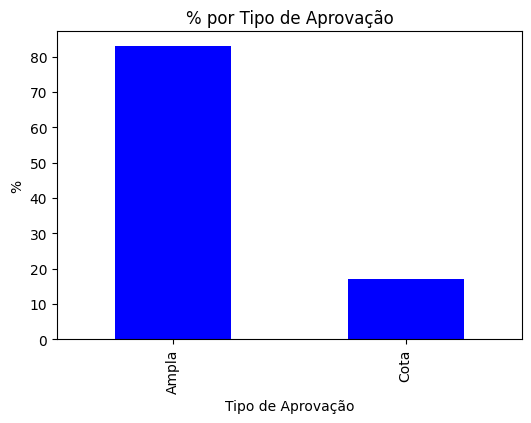

In [74]:
# mostrando um gráfico com a porcentagem de cada tipo de aprovação
porcentagem_aprovacao.plot(kind='bar', figsize=(6, 4), color='blue')
plt.title('% por Tipo de Aprovação')
plt.xlabel('Tipo de Aprovação')
plt.ylabel('%')
plt.show()

In [75]:
# analisando a coluna Jurado isoladamente
df.Jurado

0    -
1    -
2    -
3    -
4    -
    ..
4    -
5    -
6    -
7    -
8    -
Name: Jurado, Length: 3164, dtype: object

In [76]:
# obtendo a contagem de valores na coluna 'Jurado'
contagem_jurado = df['Jurado'].value_counts()

print("Quantidade de Jurados:")
print(f"Não Jurado (-): {contagem_jurado['-']}")
print(f"Jurado (Sim): {contagem_jurado['Sim']}")

Quantidade de Jurados:
Não Jurado (-): 3134
Jurado (Sim): 30


##Conclusão da primeiras análises
Nessa primeira análise, podemos obter algumas conclusões. O número total de aprovados para esse cargo foi de **3164**.

Dentre os aprovados, **2612 (83%)** são da ampla concorrência enquanto **552 (17%)** pertencem às cotas. Além disso, apenas **30** aprovados já atuaram como jurados.

## Análise Exploratória de Dados (EDA)

Nessa etapa, vamos analisar algumas medidas estatísticas gerais.

In [77]:
# visualizando as primeiras linhas do Dataset
df.head()

,Nascimento,Jurado,Portuguesa,Específicos,Básicos de Informática,Total de Pontos,Classificação,Situação,Ampla/Cota,Idade
0,1989-08-04,-,23,48,9,80,1o,Aprovado,Ampla,35
1,1998-04-02,-,27,47,6,80,2o,Aprovado,Ampla,26
2,1999-03-16,-,20,51,8,79,3o,Aprovado Negro/Índio,Cota,25
3,1986-03-23,-,23,50,6,79,4o,Aprovado,Ampla,38
4,1993-02-07,-,24,49,6,79,5o,Aprovado,Ampla,31


In [78]:
# visualizando dados estatísticos gerais
df.describe()

,Nascimento,Portuguesa,Específicos,Básicos de Informática,Total de Pontos,Idade
count,3164,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000
mean,1989-10-18 04:27:36.637168128,18.981669,35.169090,5.956384,60.107143,34.685841
min,1963-05-09 00:00:00,15.000000,30.000000,5.000000,50.000000,21.000000
25%,1985-11-16 00:00:00,17.000000,32.000000,5.000000,56.000000,30.000000
50%,1990-09-09 12:00:00,19.000000,34.000000,6.000000,59.000000,34.000000
75%,1994-06-02 00:00:00,21.000000,38.000000,7.000000,64.000000,39.000000
max,2003-11-28 00:00:00,28.000000,51.000000,10.000000,80.000000,61.000000
std,NaN,2.570839,4.156994,1.021424,5.553598,6.164766


In [79]:
# obtendo a média do Total de Pontos
# obtendo a moda do Total de Pontos
# obtendo a mediana do Total de Pontos
# obtendo o menor valor do Total de Pontos
# obtendo o maior valor Total de Pontos
print(f"Média do Total de Pontos: {round(df['Total de Pontos'].mean())}")
print(f"Moda do Total de Pontos: {round(df['Total de Pontos'].mode().iloc[0])}")
print(f"Mediana do Total de Pontos: {round(df['Total de Pontos'].median())}")
print(f"Menor Total de Pontos: {round(df['Total de Pontos'].min())}")
print(f"Maior Total de Pontos: {round(df['Total de Pontos'].max())}")

Média do Total de Pontos: 60
Moda do Total de Pontos: 57
Mediana do Total de Pontos: 59
Menor Total de Pontos: 50
Maior Total de Pontos: 80


In [109]:
# obtendo a quantidadde de candidatos por total de pontos
print("Quantidade de candidatos por Total de Pontos")
df['Total de Pontos'].value_counts()

Quantidade de candidatos por Total de Pontos


Total de Pontos
57    236
59    225
56    225
55    215
58    207
61    204
60    202
54    185
62    170
63    155
64    144
53    124
65    119
66    109
52    103
67     93
68     87
69     81
51     61
71     49
70     38
72     35
50     27
73     25
74     20
78      6
75      5
76      5
77      4
79      3
80      2
Name: count, dtype: int64

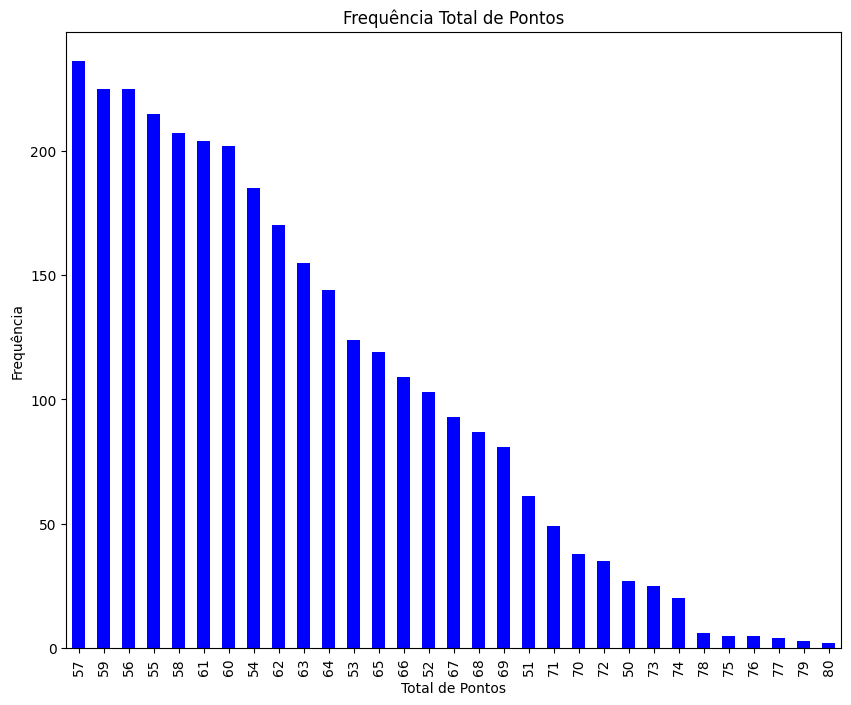

In [81]:
# mostrando um gráfico com a frequência da Total de Pontos
df['Total de Pontos'].value_counts().plot(kind='bar', figsize=(10, 8), color='blue')
plt.title('Frequência Total de Pontos')
plt.xlabel('Total de Pontos')
plt.ylabel('Frequência')
plt.show()

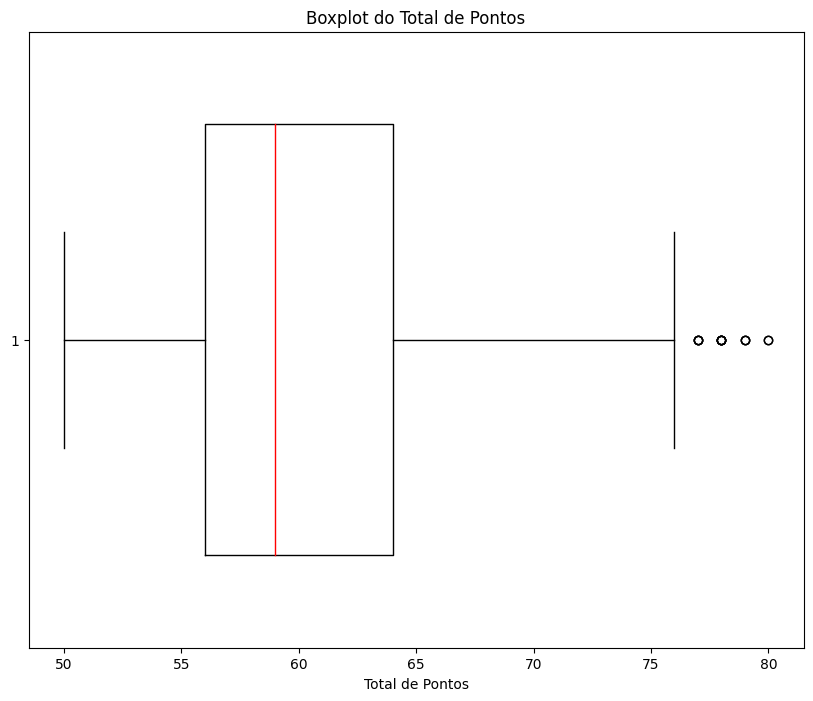

In [82]:
# mostrando um gráfio de boxplot da Nota Total
plt.figure(figsize=(10, 8))
plt.boxplot(df['Total de Pontos'],
            vert=False,
            widths=0.7,
            medianprops=dict(color='red'))
plt.title('Boxplot do Total de Pontos')
plt.xlabel('Total de Pontos')
plt.show()

In [104]:
# obtendo as médias por matéria dos candidatos que obtiveram total de pontos 57 (moda)
df.groupby('Total de Pontos').mean(numeric_only=True).loc[57]

Portuguesa                18.275424
Específicos               32.915254
Básicos de Informática     5.809322
Idade                     34.483051
Name: 57, dtype: float64

In [103]:
# obtendo a média de pontos cada matéria e idade por total de pontos
df.groupby('Total de Pontos').mean(numeric_only=True)

,Portuguesa,Específicos,Básicos de Informática,Idade
Total de Pontos,,,,
50,15.000000,30.000000,5.000000,35.666667
51,15.393443,30.327869,5.278689,35.475410
52,15.786408,30.737864,5.475728,35.106796
53,16.370968,31.225806,5.403226,35.548387
54,16.902703,31.610811,5.486486,35.200000
55,17.353488,31.916279,5.730233,35.134884
56,18.071111,32.168889,5.760000,34.986667
57,18.275424,32.915254,5.809322,34.483051
58,18.555556,33.570048,5.874396,35.859903


##Conclusão da Análise Exploratória de Dados

É possível notar pela EDA que a nota mais alta foi **80** e a mínima foi **50**. Além disso, a nota mais obtida (moda) foi **57** (236 candidatos com essa nota).

Precebe-se, também, que os candidatos que fizeram **57 pontos** têm, em média, **34 anos**. Ainda sobre a idade, a mínima dos candidatos é **21 anos** e a máxima é **61 anos**.

Obs.: dados relacioanados à idade estão de acordo com a data da análise.

##Exportação dos dados

In [106]:
# exportando o Dataframe para Excel
df.to_excel("aprovados_pcerj_2022.xlsx", sheet_name="Aprovados")